# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [3]:
#seu código aqui
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(1000)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3842-IYKUE,Female,0,No,No,35,NaN,Fiber optic,No,Yes,No,Month-to-month,Credit card (automatic),85.30,2917.50,Yes
996,6641-XRPSU,Female,0,No,No,34,NaN,Fiber optic,No,No,No,Month-to-month,Credit card (automatic),70.00,2416.10,Yes
997,1374-DMZUI,Female,1,No,No,4,NaN,Fiber optic,No,No,Yes,Month-to-month,Electronic check,94.30,424.45,Yes
998,2545-LXYVJ,Male,0,Yes,No,72,NaN,No,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic),20.70,1492.10,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

A única coluna que apresenta um tipo de dado não concordante com o esperado é a coluna de 'Churn'. Contudo, sua transformação será realizada ao final da atividade, antes do exercício 3, pois a mesma é a coluna alvo, sendo sua transformação dependente de outros pré-processamentos.

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [5]:
#seu código aqui
df.isnull().values.any()

True

In [6]:
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

A coluna que terá suas linhas com dados faltantes excluídos é a coluna 'Genero', pois a mesma apresenta uma porcentagem ínfima em relação ao conjunto
total do banco de dados.

In [7]:
#seu código aqui
df[df['Genero'].isnull()]

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN
10,9763-GRSKD,NaN,0,Yes,Yes,13,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,NaN,587.45,No
11,7469-LKBCI,NaN,0,No,No,16,Yes,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),NaN,326.80,No
12,8091-TTVAX,NaN,0,Yes,No,58,Yes,Fiber optic,No,No,Yes,One year,Credit card (automatic),NaN,5681.10,No
13,0280-XJGEX,NaN,0,No,No,49,Yes,Fiber optic,No,No,Yes,Month-to-month,Bank transfer (automatic),NaN,5036.30,Yes


In [8]:
df.dropna(subset=['Genero'], inplace=True)
df['Genero'].isnull().sum()

0

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

As linhas de colunas que devem ser substituídas são aquelas referentes às variáveis 'PhoneService', pois a mesma possui mais de 59% de dados faltantes, e 'Pagamento_Mensal', visto que a ausência de pagamento pode indicar uma predisposição à saída do serviço oferecido pela empresa.

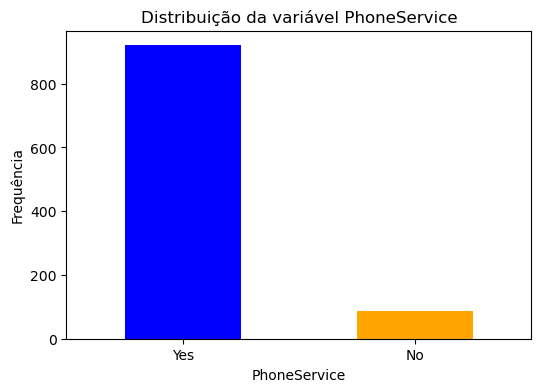

In [9]:
#seu código aqui
# Para 'PhoneService' (variável categórica):
plt.figure(figsize=(6,4))
df['PhoneService'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('PhoneService')
plt.ylabel('Frequência')
plt.title('Distribuição da variável PhoneService')
plt.xticks(rotation=0)
plt.show()

In [10]:
# Portanto, é possível substituir os valores nulos por 'Yes', sendo o mais frequente no conjunto de dados desta variável.
df['PhoneService'].fillna("Yes", inplace=True)
df['PhoneService'].isnull().sum()

C:\Users\marce\AppData\Local\Temp\ipykernel_9824\4162010907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhoneService'].fillna("Yes", inplace=True)


0

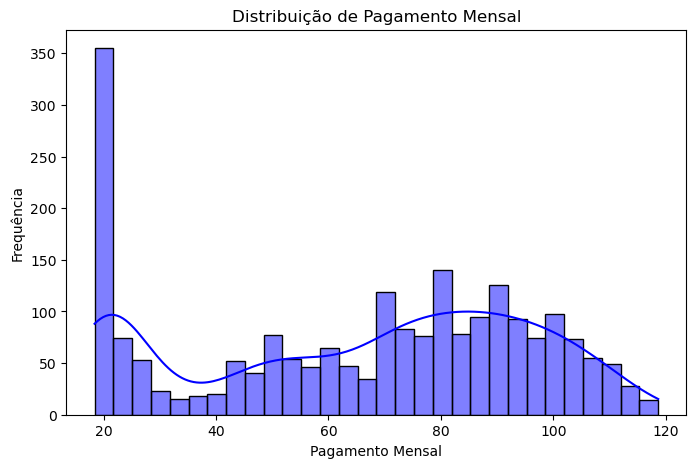

In [11]:
# Para 'Pagamento_Mensal' (variável numérica):
plt.figure(figsize=(8,5))
sns.histplot(df['Pagamento_Mensal'], bins=30, kde=True, color='blue')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Frequência')
plt.title('Distribuição de Pagamento Mensal')
plt.show()

In [12]:
# Cálculo da média:
df['Pagamento_Mensal'].mean()

65.60756321839081

In [13]:
# Cálculo da mediana:
df['Pagamento_Mensal'].median()

71.45

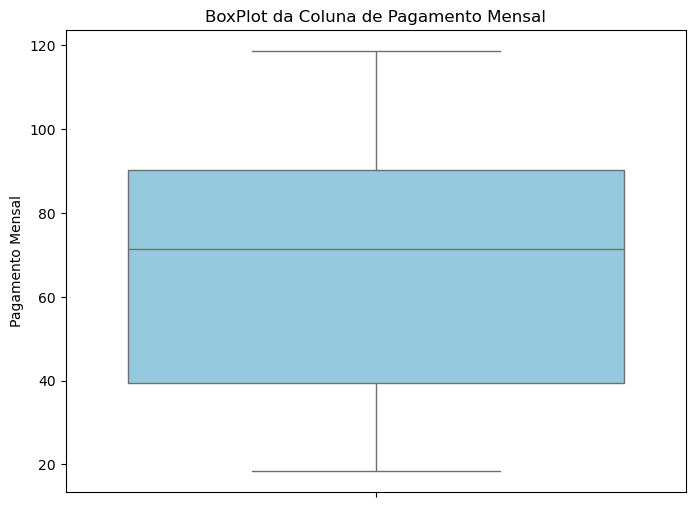

In [14]:
# BoxPlot da coluna de pagamento mensal:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('BoxPlot da Coluna de Pagamento Mensal')
plt.ylabel('Pagamento Mensal')
plt.show()

Não há outliers para o conjunto de dados, e os valores de média e mediana foram próximos, o que indica uma distribuição normal dos dados. Contudo, o gráfico de histograma apresenta uma assimetria à esquerda, o que nos sugere que a substituição pela mediana é o mais indicado.

In [15]:
mediana = df['Pagamento_Mensal'].median()
df['Pagamento_Mensal'].fillna(mediana, inplace=True)

C:\Users\marce\AppData\Local\Temp\ipykernel_9824\1826805909.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pagamento_Mensal'].fillna(mediana, inplace=True)


In [16]:
df['Pagamento_Mensal'].isnull().sum()

0

Agora, retornando ao caso da coluna 'Churn'. Sabemos que apenas 0.20% de seu total é nulo, o que indicaria que talvez excluir a mesma é o correto, mas primeiramente vamos analisar a fundo os dados. Caso não seja necessária fazer nenhuma alteração, faremos diretamente a conversão para variável int.

In [17]:
df['Churn'].isnull().sum()

0

Após o pré-processamento dos dados, podemos ver que os valores nulos de 'Churn' foram eliminados, portanto eles estavam relacionados à alguma das variáveis que foi tratada. Sendo assim, converteremos para variável int.

In [18]:
df.isnull().sum()

customerID            0
Genero                0
Idoso                 0
Casado                0
Dependents            0
Tempo_como_Cliente    0
PhoneService          0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
PaymentMethod         0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
dtype: int64

In [19]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2488 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2488 non-null   int64  
 3   Casado              2488 non-null   object 
 4   Dependents          2488 non-null   object 
 5   Tempo_como_Cliente  2488 non-null   int64  
 6   PhoneService        2488 non-null   object 
 7   Servico_Internet    2488 non-null   object 
 8   Servico_Seguranca   2488 non-null   object 
 9   Suporte_Tecnico     2488 non-null   object 
 10  StreamingTV         2488 non-null   object 
 11  Tipo_Contrato       2488 non-null   object 
 12  PaymentMethod       2488 non-null   object 
 13  Pagamento_Mensal    2488 non-null   float64
 14  Total_Pago          2488 non-null   float64
 15  Churn               2488 non-null   int32  
dtypes: float64(

In [21]:
df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,0
16,8191-XWSZG,F,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,0
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,0
18,4190-MFLUW,F,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,1
19,4183-MYFRB,F,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,0
20,8779-QRDMV,Male,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,1
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),71.45,202.25,0


# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [22]:
#seu código aqui
df.rename(columns={'customerID': 'ID_Cliente', 'Dependents': 'Dependentes', 'PhoneService': 'Servico_Telefone', 'StreamingTV': 'TV_Streaming', 'PaymentMethod': 'Metodo_Pagamento'}, inplace=True)

df.head(10)

,ID_Cliente,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,TV_Streaming,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,0
16,8191-XWSZG,F,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,0
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),71.45,7382.25,0
18,4190-MFLUW,F,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),71.45,528.35,1
19,4183-MYFRB,F,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,71.45,1862.90,0
20,8779-QRDMV,Male,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,71.45,39.65,1
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),71.45,202.25,0


In [23]:
df['Genero'].unique()

array(['Female', 'Male', 'F', 'M', 'f'], dtype=object)

In [24]:
df['Genero'] = df['Genero'].str.upper()
df['Genero'] = df['Genero'].replace('FEMALE', 'Feminino')
df['Genero'] = df['Genero'].replace('F', 'Feminino')
df['Genero'] = df['Genero'].replace('MALE', 'Masculino')
df['Genero'] = df['Genero'].replace('M', 'Masculino')

In [25]:
df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [26]:
df['Casado'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
df['Casado'] = df['Casado'].replace('Yes', 'Sim')
df['Casado'] = df['Casado'].replace('No', 'Não')

In [28]:
df['Casado'].unique()

array(['Sim', 'Não'], dtype=object)

In [29]:
df['Dependentes'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df['Dependentes'] = df['Dependentes'].replace('Yes', 'Sim')
df['Dependentes'] = df['Dependentes'].replace('No', 'Não')

In [31]:
df['Dependentes'].unique()

array(['Não', 'Sim'], dtype=object)

In [32]:
df['Servico_Telefone'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
df['Servico_Telefone'] = df['Servico_Telefone'].replace('Yes', 'Sim')
df['Servico_Telefone'] = df['Servico_Telefone'].replace('No', 'Não')

In [34]:
df['Servico_Telefone'].unique()

array(['Não', 'Sim'], dtype=object)

In [35]:
df['Servico_Internet'].unique()

array(['DSL', 'No', 'Fiber optic', 'dsl'], dtype=object)

In [36]:
df['Servico_Internet'] = df['Servico_Internet'].str.upper()
df['Servico_Internet'] = df['Servico_Internet'].replace('NO', 'Não')
df['Servico_Internet'] = df['Servico_Internet'].replace('FIBER OPTIC', 'Fibra óptica')

In [37]:
df['Servico_Internet'].unique()

array(['DSL', 'Não', 'Fibra óptica'], dtype=object)

In [38]:
df['Servico_Seguranca'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [39]:
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('No', 'Não')
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('Yes', 'Sim')
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('No internet service', 'Sem serviço de internet')

In [40]:
df['Servico_Seguranca'].unique()

array(['Não', 'Sim', 'Sem serviço de internet'], dtype=object)

In [41]:
df['Suporte_Tecnico'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [42]:
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace('No', 'Não')
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace('Yes', 'Sim')
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace('No internet service', 'Sem serviço de internet')

In [43]:
df['Suporte_Tecnico'].unique()

array(['Não', 'Sim', 'Sem serviço de internet'], dtype=object)

In [44]:
df['TV_Streaming'].unique()

array(['No', 'No internet service', 'Yes'], dtype=object)

In [45]:
df['TV_Streaming'] = df['TV_Streaming'].replace('No', 'Não')
df['TV_Streaming'] = df['TV_Streaming'].replace('Yes', 'Sim')
df['TV_Streaming'] = df['TV_Streaming'].replace('No internet service', 'Sem serviço de internet')

In [46]:
df['TV_Streaming'].unique()

array(['Não', 'Sem serviço de internet', 'Sim'], dtype=object)

In [47]:
df['Tipo_Contrato'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [48]:
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace('Month-to-month', 'Mensal')
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace('One year', 'Anual')
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace('Two year', 'Bienal')

In [49]:
df['Tipo_Contrato'].unique()

array(['Mensal', 'Anual', 'Bienal'], dtype=object)

In [50]:
df['Metodo_Pagamento'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [51]:
df['Metodo_Pagamento'] = df['Metodo_Pagamento'].replace('Electronic check', 'Boleto digital')
df['Metodo_Pagamento'] = df['Metodo_Pagamento'].replace('Mailed check', 'Boleto impresso')
df['Metodo_Pagamento'] = df['Metodo_Pagamento'].replace('Bank transfer (automatic)', 'Débito automático')
df['Metodo_Pagamento'] = df['Metodo_Pagamento'].replace('Credit card (automatic)', 'Crédito recorrente')

In [52]:
df['Metodo_Pagamento'].unique()

array(['Boleto digital', 'Boleto impresso', 'Débito automático',
       'Crédito recorrente'], dtype=object)

In [53]:
df.drop(columns=['ID_Cliente'], inplace=True)  # Retirando dados sensíveis.

In [54]:
df.head(10)

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,TV_Streaming,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,Feminino,0,Sim,Não,1,Não,DSL,Não,Não,Não,Mensal,Boleto digital,29.85,29.85,0
1,Masculino,0,Não,Não,34,Sim,DSL,Sim,Não,Não,Anual,Boleto impresso,56.95,1889.50,0
2,Masculino,0,Não,Não,2,Sim,DSL,Sim,Não,Não,Mensal,Boleto impresso,53.85,108.15,1
3,Masculino,0,Não,Não,45,Não,DSL,Sim,Sim,Não,Anual,Débito automático,71.45,1840.75,0
16,Feminino,0,Não,Não,52,Sim,Não,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Anual,Boleto impresso,71.45,1022.95,0
17,Masculino,0,Não,Sim,71,Sim,Fibra óptica,Sim,Não,Sim,Bienal,Débito automático,71.45,7382.25,0
18,Feminino,0,Sim,Sim,10,Sim,DSL,Não,Sim,Não,Mensal,Crédito recorrente,71.45,528.35,1
19,Feminino,0,Não,Não,21,Sim,Fibra óptica,Não,Não,Não,Mensal,Boleto digital,71.45,1862.90,0
20,Masculino,1,Não,Não,1,Não,DSL,Não,Não,Não,Mensal,Boleto digital,71.45,39.65,1
21,Masculino,0,Sim,Não,12,Sim,Não,Sem serviço de internet,Sem serviço de internet,Sem serviço de internet,Anual,Débito automático,71.45,202.25,0


# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

Na questão 3 já foi feita a alteração para deixar a base de dados toda em português.